In [1]:
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
from dataset import  suny_international
from animate import plot_daily

df=suny_international.load_data()

In [4]:
from keras.models import Sequential
from keras.layers import Dense

def baseline_model(input_dim):
    regressor = Sequential()
    regressor.add(Dense(units=20, activation='relu', input_dim=input_dim)) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=1))
    regressor.compile(loss='mean_squared_error', optimizer='adam')
    return regressor

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
46833.997509401175


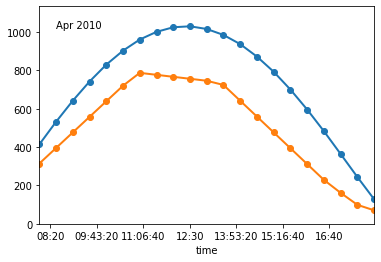

In [5]:
X=np.array(df.index.minute+df.index.hour*60).reshape(-1,1)
y=np.array(df['GHI'])
model = baseline_model(1)
history=model.fit(X,y,epochs=40,verbose=False)
print(history.history['loss'][-1])
y_pred = model.predict(X)
model.save('models/simple_dnn_daily.h5')
plot_daily(y ,y_pred.ravel(),save='media/simple_dnn_daily.mp4', index=df.index)

44758.20145343922


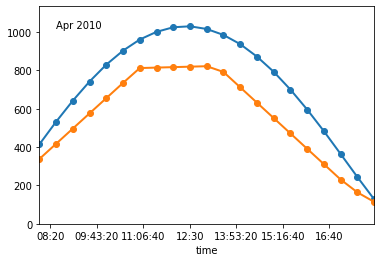

In [6]:
X=np.array([df.index.minute+df.index.hour*60,df.index.month]).T
y=np.array(df['GHI'])
model = baseline_model(X.shape[-1])
history=model.fit(X,y,epochs=40,verbose=False)
print(history.history['loss'][-1])
y_pred = model.predict(X)
model.save('models/simple_dnn_monthly.h5')
plot_daily(y ,y_pred.ravel(),save='media/simple_dnn_monthly.mp4', index=df.index)

In [ ]:
X=np.array([df.index.minute+df.index.hour*60,
            df.index.month,
            *(df[factor] for factor in suny_international.atmospheric_factors)]).T
y=np.array(df['GHI'])
model = baseline_model(X.shape[-1])
history=model.fit(X,y,epochs=40,verbose=False)
print(history.history['loss'][-1])
y_pred = model.predict(X)
model.save('models/simple_dnn_atmospheric.h5')
plot_daily(y ,y_pred.ravel(),save='media/simple_dnn_atmoshperic.mp4', index=df.index)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
